# SALES PREDICTION USING PYTHON

## Project Overview:
    The "Sales Prediction Using Python" project aims to leverage Python's data analysis and machine learning capabilities to forecast future sales trends. By analyzing historical sales data, this project will develop predictive models to assist businesses in making informed decisions, optimizing inventory, and improving revenue forecasting.
## Project Objective:
    The objective of this project is to develop a robust and accurate sales prediction system using Python, leveraging data analysis, machine learning, and predictive modeling techniques to assist businesses in making informed decisions, optimizing inventory management, and enhancing overall sales performance.

![Image Alt Text](sales.jpeg)

In [1]:
#import Libaries for Data Exploration and Data Preprocessing:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\DATASET\Sales\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum() #Missing Values in Columns

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.nunique() #Finding the unique values 

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

<Axes: xlabel='Sales', ylabel='count'>

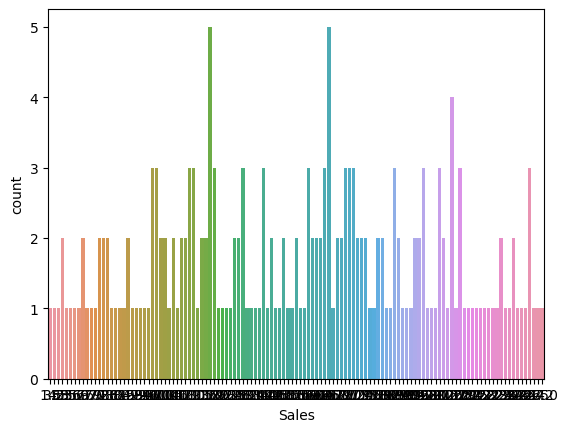

In [8]:
sns.countplot(x = df['Sales'])

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


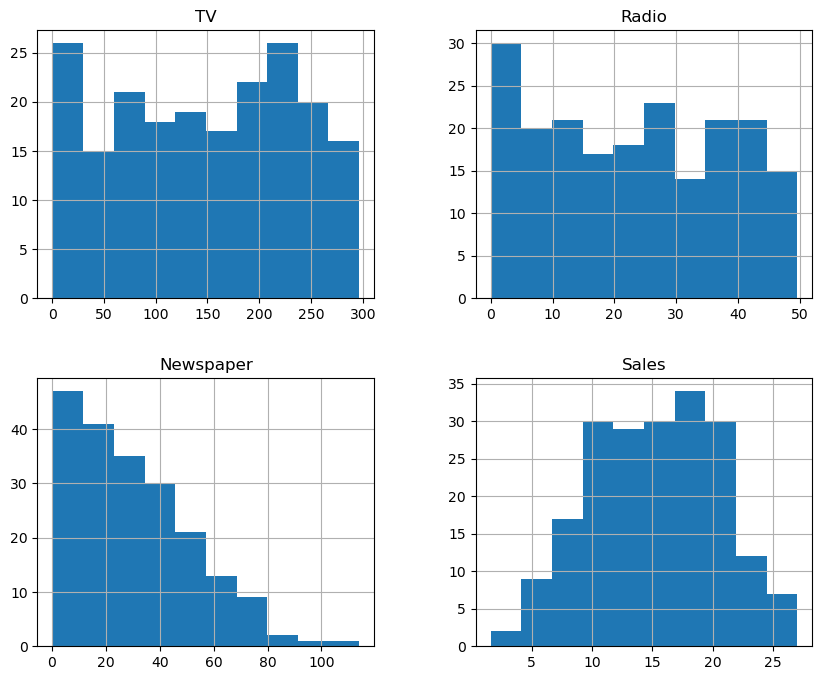

In [10]:
df.hist(figsize=(10,8))
plt.show()

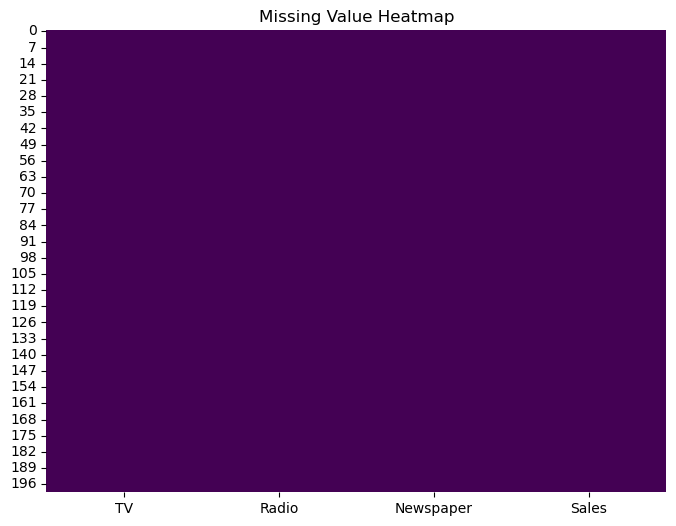

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,)
plt.title("Missing Value Heatmap")
plt.show()

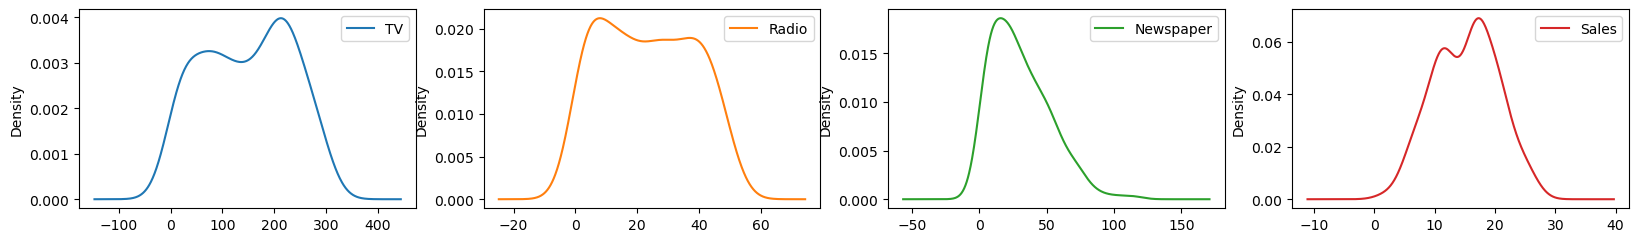

In [12]:
df.plot(kind='density',subplots=True,layout=(5,4),sharex=False,figsize=(20,15))
plt.show()

In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


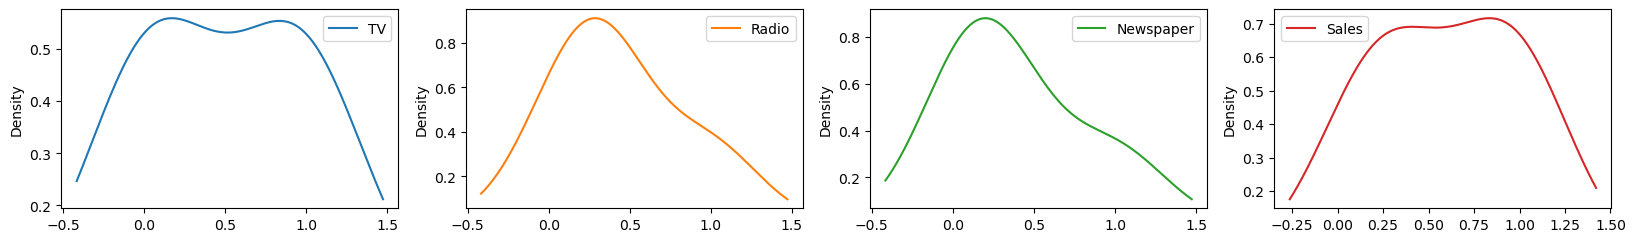

In [14]:
df.corr().plot(kind='density',subplots=True,layout=(5,4),sharex=False,figsize=(20,15))
plt.show()

<Axes: >

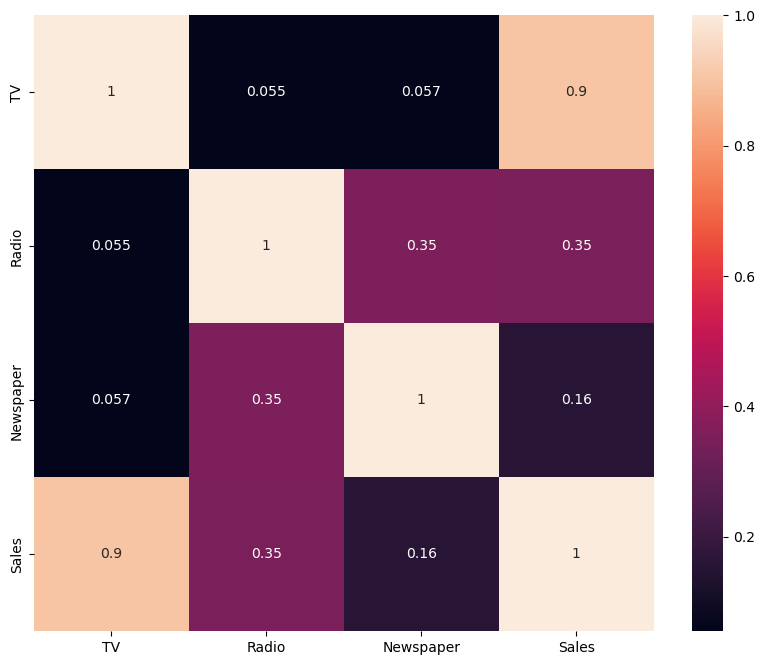

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

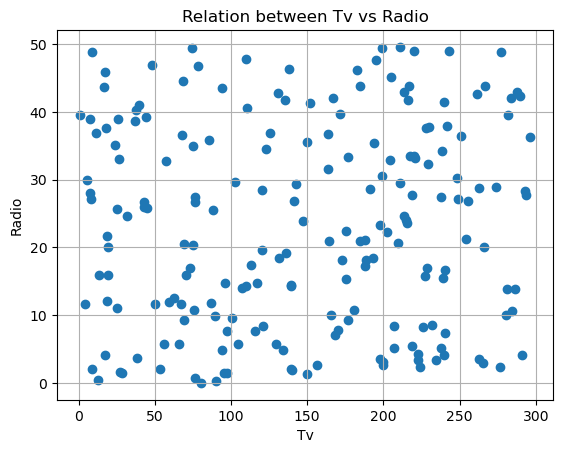

In [16]:
#Create a scatter plot with different point sizes
plt.scatter(df['TV'],df['Radio'])
plt.xlabel('Tv')
plt.ylabel('Radio')
plt.title('Relation between Tv vs Radio')
plt.grid(True)
plt.show()

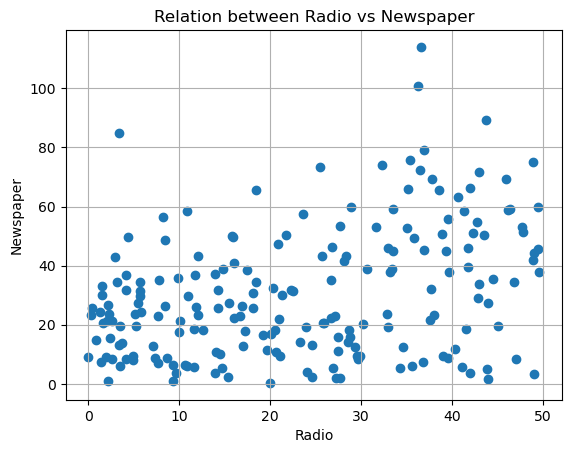

In [17]:
#Create a scatter plot with different point sizes
plt.scatter(df['Radio'],df['Newspaper'])
plt.xlabel('Radio')
plt.ylabel('Newspaper')
plt.title('Relation between Radio vs Newspaper')
plt.grid(True)
plt.show()

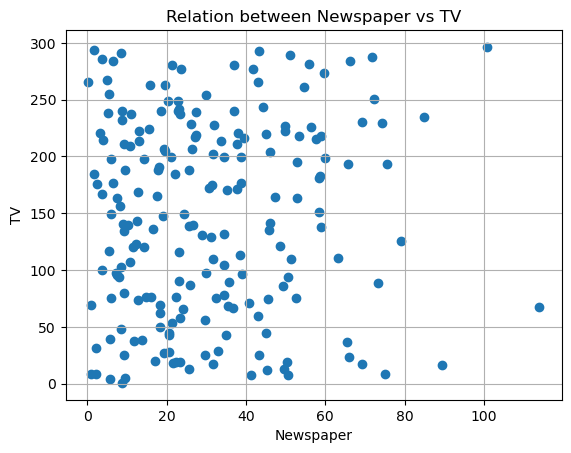

In [18]:
#Create a scatter plot with different point sizes
plt.scatter(df['Newspaper'],df['TV'])
plt.xlabel('Newspaper')
plt.ylabel('TV')
plt.title('Relation between Newspaper vs TV')
plt.grid(True)
plt.show()

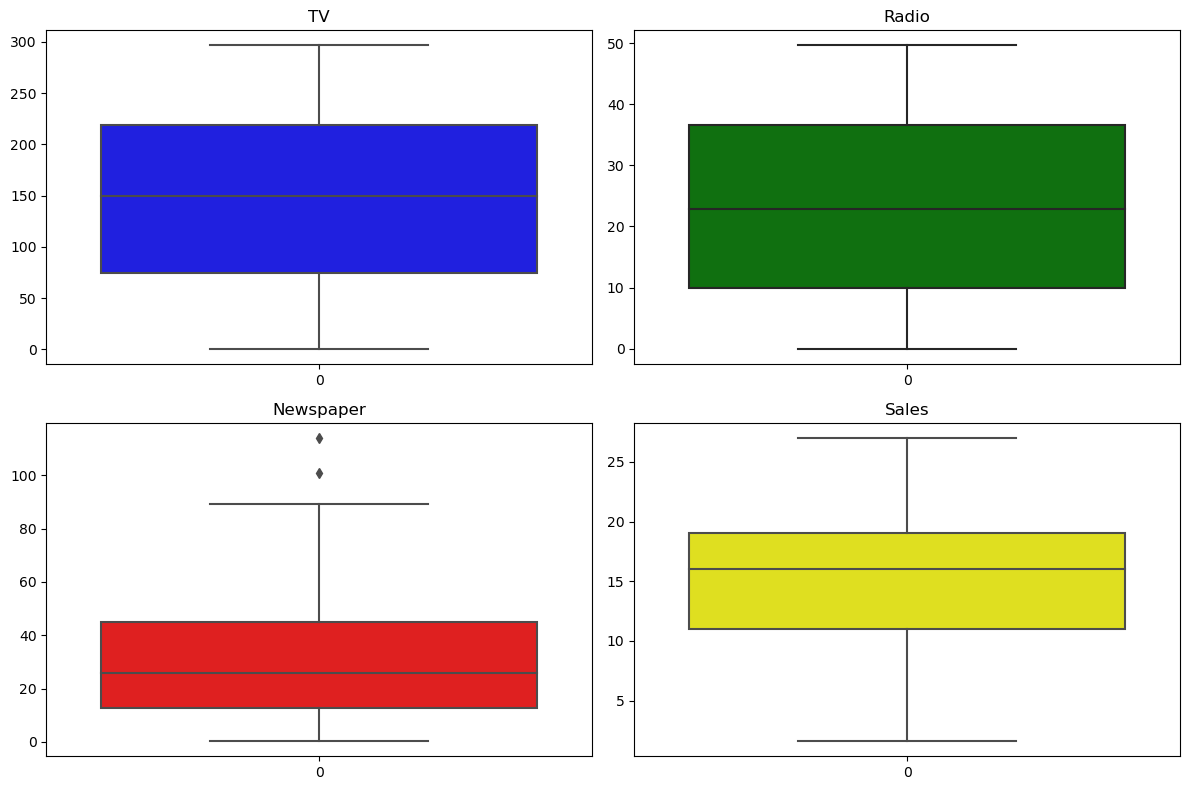

In [19]:
#Columns to create boxplots for
columns_to_plot=['TV','Radio','Newspaper','Sales']

#Create a list of different colors
colors=['blue','green','red','yellow']

#Create subplots
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,8))

#Iterate through columns and create boxplots with different colors
for i,column in enumerate(columns_to_plot):
    sns.boxplot(data=df[column],ax=axes[i//2, i%2],palette=[colors[i]])
    axes[i//2, i%2].set_title(column)

#Adjust layout
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

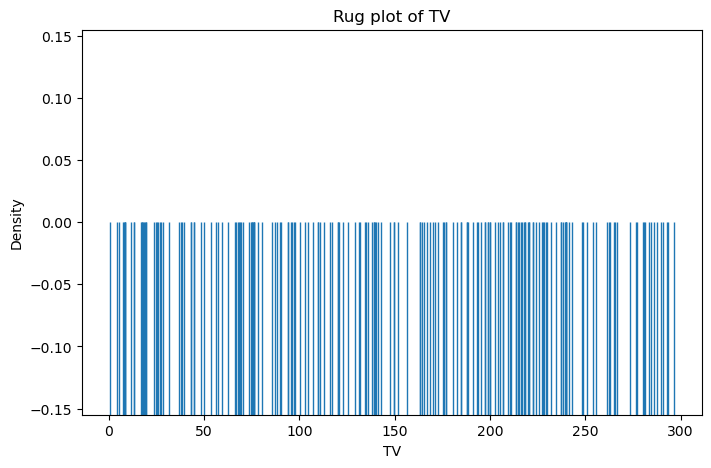

In [20]:
#Rug plot
plt.figure(figsize=(8,5))
sns.rugplot(data=df['TV'],height=0.5)
plt.title("Rug plot of TV")
plt.xlabel("TV")
plt.ylabel("Density")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

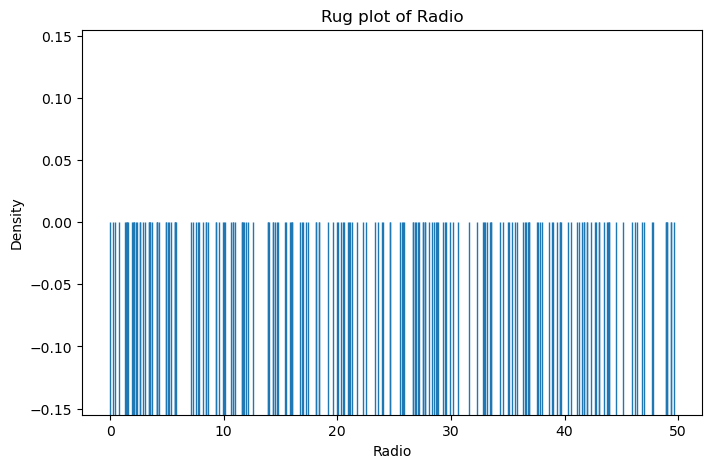

In [21]:
#Rug plot
plt.figure(figsize=(8,5))
sns.rugplot(data=df['Radio'],height=0.5)
plt.title("Rug plot of Radio")
plt.xlabel("Radio")
plt.ylabel("Density")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

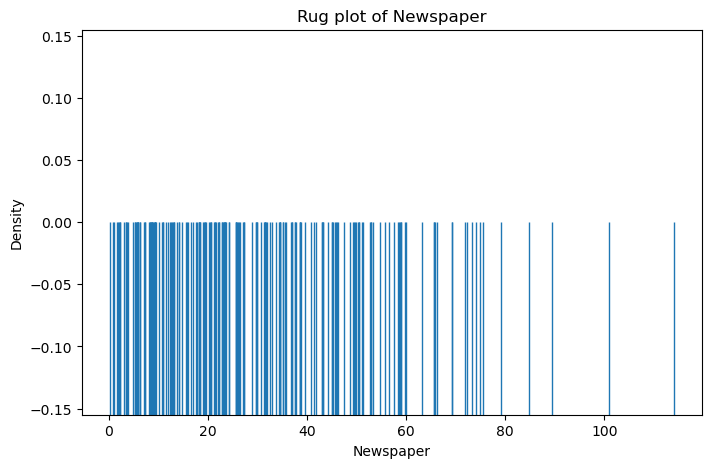

In [22]:
#Rug plot
plt.figure(figsize=(8,5))
sns.rugplot(data=df['Newspaper'],height=0.5)
plt.title("Rug plot of Newspaper")
plt.xlabel("Newspaper")
plt.ylabel("Density")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

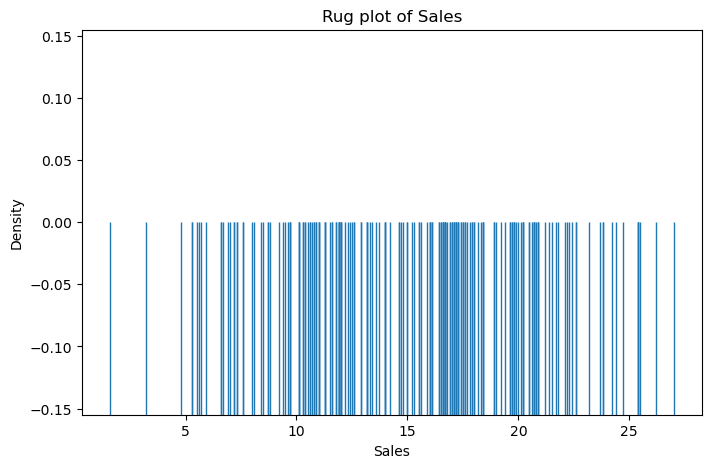

In [23]:
#Rug plot
plt.figure(figsize=(8,5))
sns.rugplot(data=df['Sales'],height=0.5)
plt.title("Rug plot of Sales")
plt.xlabel("Sales")
plt.ylabel("Density")
plt.show

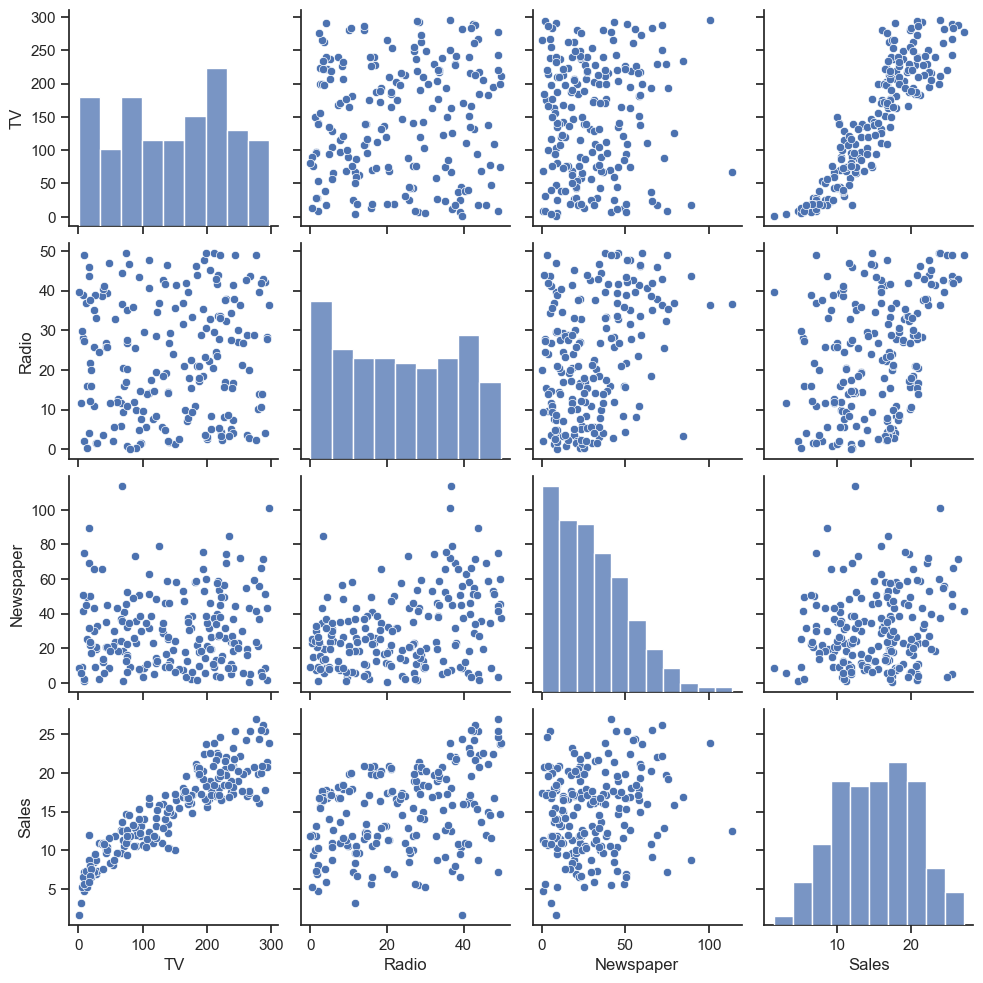

In [24]:
#Pair Plot
sns.set(style="ticks")
sns.pairplot(df,diag_kind='hist',markers=["o","s","D"])
plt.show()

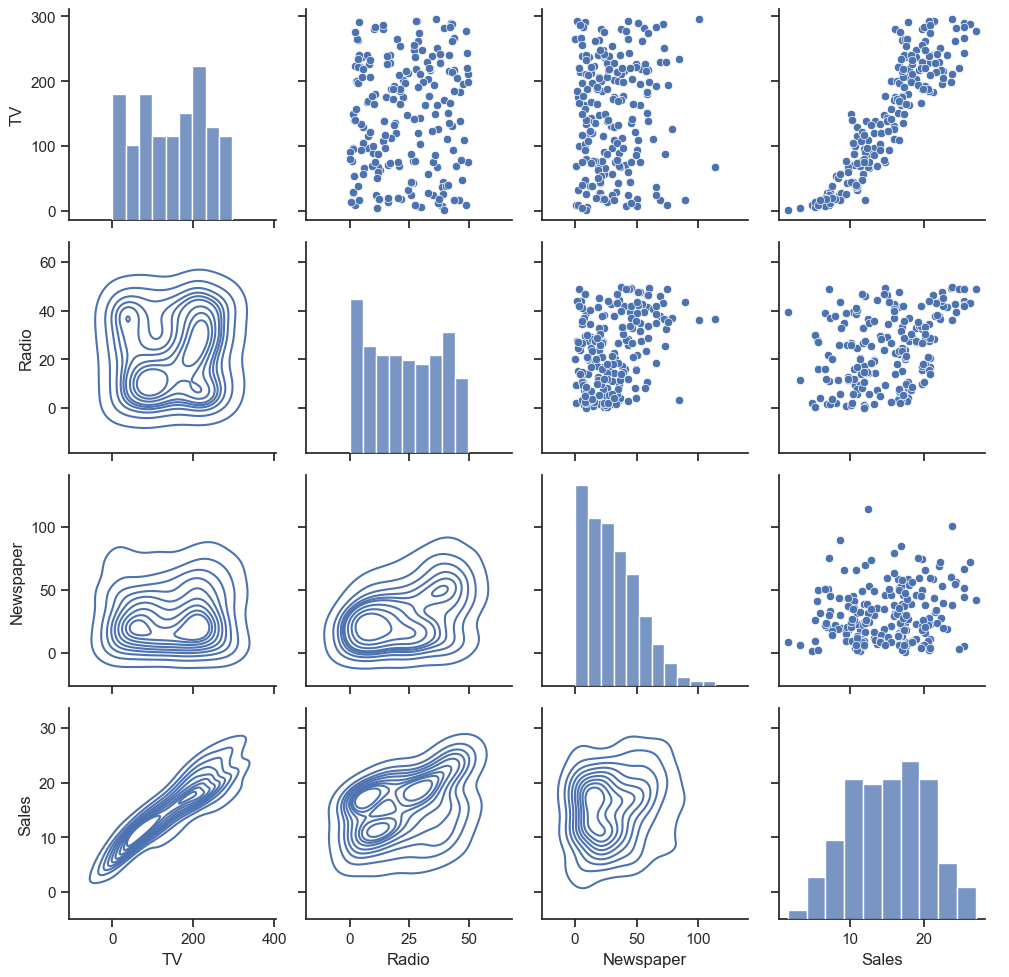

In [25]:
#Create a Facet grid of pairwise scatterplots
g=sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot,kde_kws={"color":"k"})
g.map_lower(sns.kdeplot)
g.add_legend()
plt.show()


In [26]:
X = df.drop('Sales',axis=1)
y = df['Sales']

In [27]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [28]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [29]:
#Training the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
df.shape

(200, 4)

In [31]:
X_train

,TV,Radio,Newspaper
114,78.2,46.8,34.5
173,168.4,7.1,12.8
5,8.7,48.9,75.0
126,7.8,38.9,50.6
117,76.4,0.8,14.8
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [32]:
X_test.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [33]:
y_train.shape

(150,)

In [34]:
y_test.shape

(50,)

In [35]:
from sklearn.linear_model import LinearRegression #Train the data with LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)
y_pred

array([17.04041233, 20.39964377, 23.74740099,  9.25653209, 21.67525948,
       12.56179334, 21.07865662,  8.70895483, 17.28353601, 16.68491851,
        8.92573172,  8.50762572, 18.2530284 ,  8.06003145, 12.68447869,
       14.96677492,  8.12198913, 17.91906169, 11.01929198, 20.4979062 ,
       20.81737524, 12.58662099, 10.88870324, 22.39692163,  9.44183427,
        7.95532725, 20.83706013, 13.83997207, 10.79282849,  7.92309626,
       16.00432589, 10.64496918, 20.79094843, 10.40916722, 21.61788525,
       21.1954234 , 12.10497731, 22.82970275, 12.63229447,  6.49245031,
       11.94463925, 15.3638056 ,  9.91037996,  9.48003396, 17.28192106,
        7.25660905, 10.36937236, 15.25293577, 11.17116856, 11.72114226])

In [37]:
# Evaluate the model performance on the test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_LR = model.predict(X_test)

print('R^2: ', r2_score(y_test, y_pred_LR))
print('MAE: ',mean_absolute_error(y_test, y_pred_LR))
print('MSE: ', mean_squared_error(y_test, y_pred_LR))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_LR)))

R^2:  0.9115647723992757
MAE:  1.119994071336178
MSE:  2.404067444711889
RMSE:  1.5505055448826648


In [38]:
# Evaluate the model performance on the training data
print('Coefficient of determination: ', model.score(X_train, y_train))

Coefficient of determination:  0.8957759851376041


In [39]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_LR.ravel(),
                        'residual': y_test - y_pred_LR}
                      )
results.head()

,actual,predicted,residual
95,16.9,17.040412,-0.140412
15,22.4,20.399644,2.000356
30,21.4,23.747401,-2.347401
158,7.3,9.256532,-1.956532
128,24.7,21.675259,3.024741


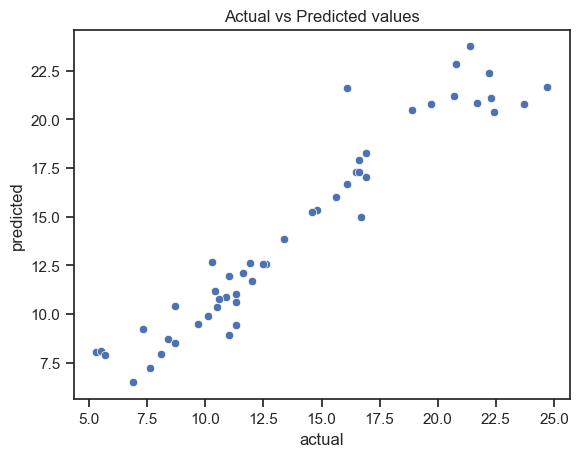

In [40]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'], y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()


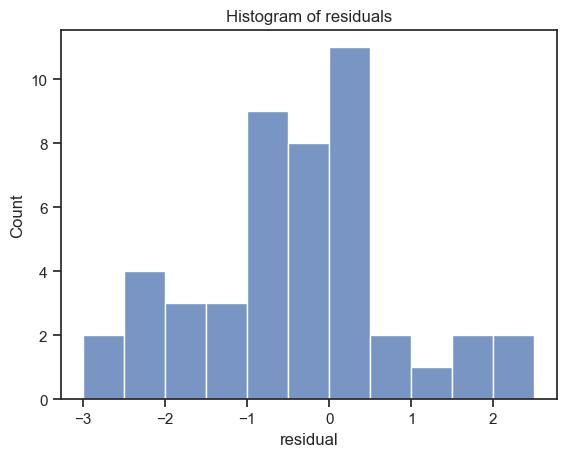

In [41]:
 # Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-3,3,0.5))
plt.title('Histogram of residuals')
plt.show()

In [42]:
# Calculate residual mean
results['residual'].mean()

-0.3769383894785936

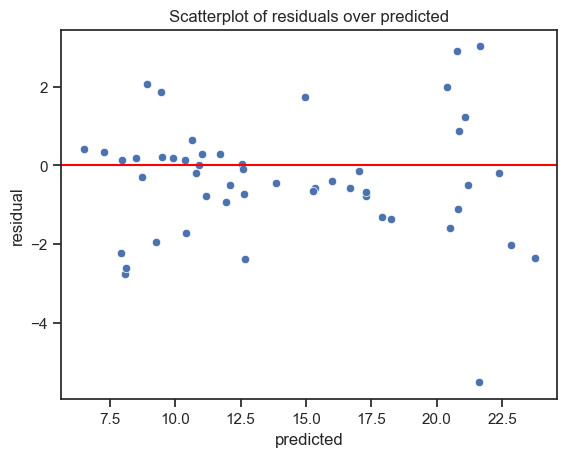

In [43]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()

In [44]:
data = {'TV': [220.3],'Radio': [49.5],'Newspaper': [3.2],}
df = pd.DataFrame(data)

In [45]:
# Predict the movie rating
predicted_rating = model.predict(df)

# Display the predicted rating
print("Sales Rating:", predicted_rating[0])

Sales Rating: 21.725139213350054
